In [1]:
# setosa = pd.DataFrame(iris[iris["species"] == "versicolor"])
# setosa.head()

#val_inputs[['MinTemp']].describe().loc[['min','max']]


# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier

#validation error is one minus validation accuracy.

In [2]:
#!pip list # shows the versions of libaries installed

# Decision Trees and Random Forests - Machine Learning with Python
![](https://i.imgur.com/N8aIuRK.jpg)
The following topics are covered in this tutorial:

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting decision trees
- Training and interpreting random forests
- Overfitting, hyperparameter tuning & regularization
- Making predictions on single inputs


## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn how to use _decision trees_ and _random forests_ to solve a real-world problem from [Kaggle](https://kaggle.com/datasets):

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data

The dataset is available at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package .


The file weatherAUS.csv contains the data. Let's load it into a Pandas dataframe.

In [4]:
raw_df = pd.read_csv('weatherAUS.csv')
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54240,2015-02-15,MountGinini,9.0,17.3,21.4,NaN,NaN,WSW,37.0,WSW,W,7.0,9.0,98.0,82.0,NaN,NaN,NaN,NaN,12.3,15.1,Yes,No
54241,2015-02-16,MountGinini,10.3,23.7,0.0,NaN,NaN,WNW,28.0,WNW,WSW,15.0,9.0,94.0,59.0,NaN,NaN,NaN,NaN,13.8,20.8,No,No
54242,2015-02-17,MountGinini,12.0,22.0,0.4,NaN,NaN,SSW,37.0,NE,NNE,13.0,9.0,94.0,63.0,NaN,NaN,NaN,NaN,13.8,19.5,No,Yes
54243,2015-02-18,MountGinini,11.5,19.0,3.6,NaN,NaN,ENE,46.0,E,ENE,6.0,11.0,98.0,62.0,NaN,NaN,NaN,NaN,12.4,17.8,Yes,No


Each row shows the measurements for a given date at a given location. The last column "RainTomorrow" contains the value to be predicted.

Let's check the column types of the dataset.

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54245 entries, 0 to 54244
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           54245 non-null  object 
 1   Location       54245 non-null  object 
 2   MinTemp        53629 non-null  float64
 3   MaxTemp        53801 non-null  float64
 4   Rainfall       52816 non-null  float64
 5   Evaporation    24047 non-null  float64
 6   Sunshine       18441 non-null  float64
 7   WindGustDir    48398 non-null  object 
 8   WindGustSpeed  48405 non-null  float64
 9   WindDir9am     48002 non-null  object 
 10  WindDir3pm     51568 non-null  object 
 11  WindSpeed9am   52892 non-null  float64
 12  WindSpeed3pm   52271 non-null  float64
 13  Humidity9am    53020 non-null  float64
 14  Humidity3pm    52539 non-null  float64
 15  Pressure9am    45067 non-null  float64
 16  Pressure3pm    45117 non-null  float64
 17  Cloud9am       29614 non-null  float64
 18  Cloud3

In [6]:
#Let's drop any rows where the value of the target column RainTomorrow in empty.
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

### Training, Validation and Test Sets

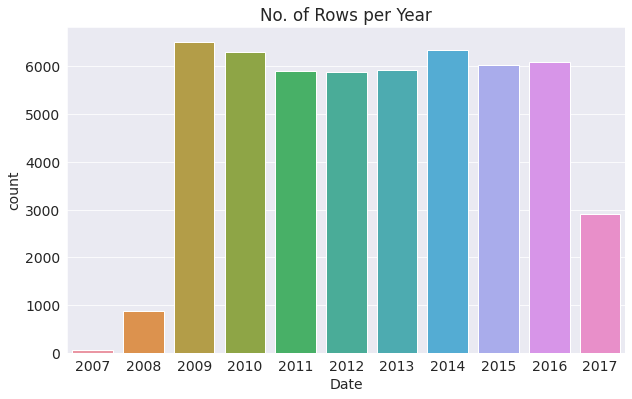

In [7]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

While working with chronological data, it's often a good idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

We'll use the data till 2014 for the training set, data from 2015 for the validation set, and the data from 2016 & 2017 for the test set.  

In [8]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]


print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (37801, 23)
val_df.shape : (6026, 23)
test_df.shape : (8990, 23)


> **EXERCISE**: Scrape climate data for recent years (2017 to 2021) from http://www.bom.gov.au/climate/data and try training a model with the enlarged dataset. 

### Input and Target Columns

Let's identify the input and target columns.

In [9]:
input_cols = list(train_df.columns)[1:-1] 
#Excluding the first and last column.
target_col = 'RainTomorrow'

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [10]:
#Let's also identify the numeric and categorical columns.

numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [11]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [12]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### Imputing missing numeric values

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [15]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [16]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Scaling Numeric Features

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [19]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [20]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.039267,0.159533,0.0000,0.00000,0.000000,0.0,0.000000,0.000000,0.020619,0.030303,0.234609,0.275042,0.000000,0.0,0.112385,0.164093
max,0.939791,0.912451,0.6469,0.41931,0.985816,1.0,0.669231,0.891566,1.000000,1.000000,0.976705,0.967742,0.888889,1.0,0.924312,0.915058


### Encoding Categorical Data

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('Unknown')
val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna('Unknown')
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('Unknown')

In [23]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [24]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [25]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [26]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Albury,Location_BadgerysCreek,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Moree,Location_MountGinini,Location_Newcastle,Location_NorahHead,Location_NorfolkIsland,Location_Penrith,Location_Richmond,Location_Sydney,Location_SydneyAirport,Location_Tuggeranong,Location_WaggaWagga,Location_Williamtown,Location_Wollongong,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_Unknown,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_Unknown,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Unknown,RainToday_Yes
2498,Albury,0.756545,0.811284,0.000000,0.038093,0.53683,ENE,0.367188,Unknown,ESE,0.000000,0.084337,0.443299,0.161616,0.547421,0.512733,0.777778,0.375000,0.733945,0.806950,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.769634,0.733463,0.001078,0.038093,0.53683,SSE,0.335938,SSE,SE,0.069231,0.204819,0.525773,0.292929,0.509151,0.499151,0.888889,1.000000,0.704128,0.710425,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.704188,0.529183,0.005930,0.038093,0.53683,ENE,0.320312,ESE,ENE,0.084615,0.469880,0.608247,0.666667,0.557404,0.607810,0.888889,1.000000,0.635321,0.474903,Yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.675393,0.540856,0.042049,0.038093,0.53683,SSE,0.250000,SE,SSE,0.069231,0.204819,0.731959,0.646465,0.622296,0.636672,0.888889,1.000000,0.575688,0.515444,Yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,Albury,0.628272,0.525292,0.018329,0.038093,0.53683,ENE,0.187500,SE,SSE,0.046154,0.108434,0.917526,0.626263,0.595674,0.592530,0.888889,1.000000,0.529817,0.527027,Yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [27]:
#As a final step, let's drop the textual categorical columns, so that we're left with just numeric data.
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [28]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albury,Location_BadgerysCreek,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Moree,Location_MountGinini,Location_Newcastle,Location_NorahHead,Location_NorfolkIsland,Location_Penrith,Location_Richmond,Location_Sydney,Location_SydneyAirport,Location_Tuggeranong,Location_WaggaWagga,Location_Williamtown,Location_Wollongong,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_Unknown,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_Unknown,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Unknown,RainToday_Yes
2498,0.756545,0.811284,0.000000,0.038093,0.53683,0.367188,0.000000,0.084337,0.443299,0.161616,0.547421,0.512733,0.777778,0.375000,0.733945,0.806950,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,0.769634,0.733463,0.001078,0.038093,0.53683,0.335938,0.069231,0.204819,0.525773,0.292929,0.509151,0.499151,0.888889,1.000000,0.704128,0.710425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.704188,0.529183,0.005930,0.038093,0.53683,0.320312,0.084615,0.469880,0.608247,0.666667,0.557404,0.607810,0.888889,1.000000,0.635321,0.474903,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,0.675393,0.540856,0.042049,0.038093,0.53683,0.250000,0.069231,0.204819,0.731959,0.646465,0.622296,0.636672,0.888889,1.000000,0.575688,0.515444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,0.628272,0.525292,0.018329,0.038093,0.53683,0.187500,0.046154,0.108434,0.917526,0.626263,0.595674,0.592530,0.888889,1.000000,0.529817,0.527027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,0.191099,0.373541,0.001078,0.038093,0.53683,0.062500,0.000000,0.084337,1.000000,0.373737,0.803661,0.803056,0.490103,0.559471,0.126147,0.382

## Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier(random_state=42)

In [31]:
%%time

model.fit(X_train, train_targets)

CPU times: user 883 ms, sys: 2.97 ms, total: 886 ms
Wall time: 888 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

An optimal decision tree has now been created using the training data.


### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albury,Location_BadgerysCreek,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Moree,Location_MountGinini,Location_Newcastle,Location_NorahHead,Location_NorfolkIsland,Location_Penrith,Location_Richmond,Location_Sydney,Location_SydneyAirport,Location_Tuggeranong,Location_WaggaWagga,Location_Williamtown,Location_Wollongong,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_Unknown,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_Unknown,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Unknown,RainToday_Yes
0,0.573298,0.525292,0.001617,0.038093,0.53683,0.289062,0.153846,0.289157,0.701031,0.212121,0.452579,0.477080,0.888889,0.559471,0.522936,0.519305,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.416230,0.568093,0.000000,0.038093,0.53683,0.289062,0.030769,0.265060,0.422680,0.242424,0.500832,0.488964,0.490103,0.559471,0.529817,0.567568,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.560209,0.579767,0.000000,0.038093,0.53683,0.304688,0.146154,0.313253,0.360825,0.292929,0.450915,0.504244,0.490103,0.250000,0.616972,0.546332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.463351,0.624514,0.000000,0.038093,0.53683,0.132812,0.084615,0.108434,0.432990,0.151515,0.617304,0.573854,0.490103,0.559471,0.550459,0.610039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.680628,0.708171,0.002695,0.038093,0.53683,0.265625,0.053846,0.240964,0.814433,0.323232,0.504160,0.458404,0.777778,1.000000,0.543578,0.671815,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54190,0.321990,0.357977,0.000000,0.038093,0.53683,0.218750,0.069231,0.108434,0.979381,0.676768,0.629798,0.624567,0.490103,0.559471,0.275229,0.332046,0.0,0.0,0.0

In [34]:
#model prdicts - (yes no) based on what is been fit on it - train_targets(yes no)
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [35]:
pd.value_counts(train_preds)

No     29429
Yes     8372
dtype: int64

In [36]:
#The decision tree also returns probabilities for each prediction.
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [37]:
#check the accuracy of its predictions.
accuracy_score(train_targets, train_preds)

0.9999470913467897

Seems like the decision tree is quite confident about its predictions.

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using model.score

In [38]:
model.score(X_val, val_targets)

0.7753070029870561

same shape - accuracy_score (train_targets, train_preds_targets)

datframe and traget feature - model.score (X_val, val_targets)

Although the training accuracy is 100%, the accuracy on the validation set is just about 79%, which is only marginally better then always predicting "No". 

In [39]:
val_targets.value_counts() / len(val_targets)

No     0.763359
Yes    0.236641
Name: RainTomorrow, dtype: float64

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [40]:
from sklearn.tree import plot_tree, export_text

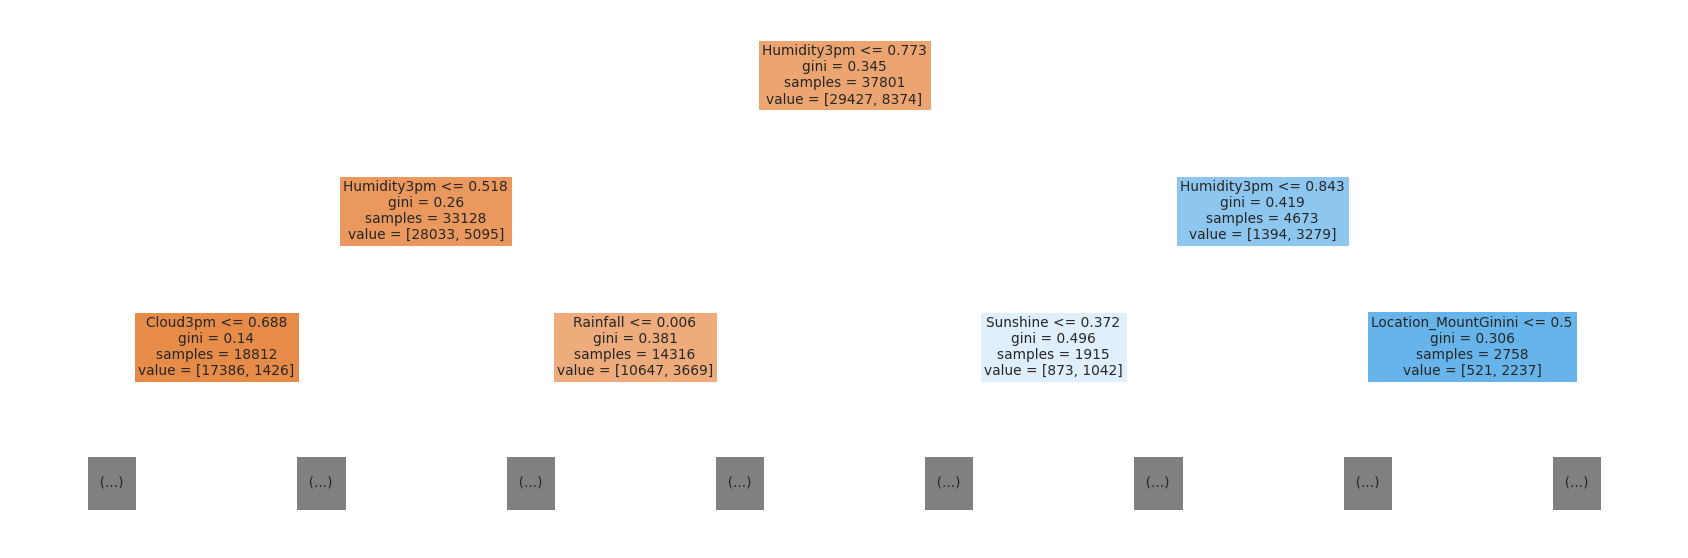

In [41]:
plt.figure(figsize=(30,10))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

Can you see how the model classifies a given input as a series of decisions? The tree is truncated here, but following any path from the root node down to a leaf will result in "Yes" or "No". Do you see how a decision tree differs from a logistic regression model?


**How a Decision Tree is Created**

Note the `gini` value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0. 

For a mathematical discussion of the Gini Index, watch this video: https://www.youtube.com/watch?v=-W0DnxQK1Eo . It has the following formula:

<img src="https://i.imgur.com/CSC0gAo.png" width="240">

Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

The iterative approach of the machine learning workflow in the case of a decision tree involves growing the tree layer-by-layer:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Let's check the depth of the tree that was created.

In [42]:
model.tree_.max_depth

50

We can also display the tree as text, which can be easier to follow for deeper trees.

In [43]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.77
|   |--- Humidity3pm <= 0.52
|   |   |--- Cloud3pm <= 0.69
|   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |--- Humidity3pm <= 0.44
|   |   |   |   |   |--- Pressure3pm <= 0.55
|   |   |   |   |   |   |--- Humidity9am <= 0.65
|   |   |   |   |   |   |   |--- Sunshine <= 0.49
|   |   |   |   |   |   |   |   |--- Humidity9am <= 0.62
|   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.75
|   |   |   |   |   |   |   |   |   |   |--- WindDir3pm_E <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- WindDir3pm_E >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- MinTemp >  0.75
|   |   |   |   |   |   |   |   |   |   |--- Location_WaggaWagga <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Location_WaggaWagga >  0.50
|   |   |   |   |   |   |   |   |   |   |   |-

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [44]:
model.feature_importances_

array([0.04764206, 0.04521702, 0.04559599, 0.01946292, 0.03416774,
       0.04751437, 0.02855256, 0.03293237, 0.04076509, 0.29161029,
       0.02773115, 0.04374011, 0.01480597, 0.02469528, 0.0336096 ,
       0.03791867, 0.00155493, 0.00177006, 0.00267611, 0.00073159,
       0.00368533, 0.00119495, 0.00858604, 0.00164636, 0.00196972,
       0.00203493, 0.00222804, 0.00197757, 0.00216442, 0.00214691,
       0.00275955, 0.00169539, 0.00327352, 0.00323916, 0.00179668,
       0.00324562, 0.00393152, 0.0025147 , 0.00376301, 0.00344001,
       0.00223583, 0.00346916, 0.00259655, 0.00302426, 0.00178225,
       0.00287012, 0.00244151, 0.00138014, 0.00266306, 0.00345277,
       0.00252447, 0.0020846 , 0.00286734, 0.00153984, 0.00266428,
       0.00270219, 0.00275714, 0.0023421 , 0.00276823, 0.00158886,
       0.00226887, 0.00210124, 0.00238346, 0.00227227, 0.00146666,
       0.00246139, 0.00311122, 0.00217252, 0.00340585, 0.0031794 ,
       0.00219533, 0.00258217, 0.00419191, 0.00215517, 0.00297

In [45]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Location_Albury', 'Location_BadgerysCreek',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Moree', 'Location_MountGinini', 'Location_Newcastle',
       'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Penrith',
       'Location_Richmond', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Tuggeranong', 'Location_WaggaWagga', 'Location_Williamtown',
       'Location_Wollongong', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW',
       'WindGustDir_Unknown', 'WindGustDir_W', 'WindGus

In [46]:
#turn this into a dataframe and visualize the most important features.
importance_df = pd.DataFrame({
    'features' : X_train.columns,
    'importance' : model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

,features,importance
9,Humidity3pm,0.291610
0,MinTemp,0.047642
5,WindGustSpeed,0.047514
2,Rainfall,0.045596
1,MaxTemp,0.045217
11,Pressure3pm,0.043740
8,Humidity9am,0.040765
15,Temp3pm,0.037919
4,Sunshine,0.034168
14,Temp9am,0.033610


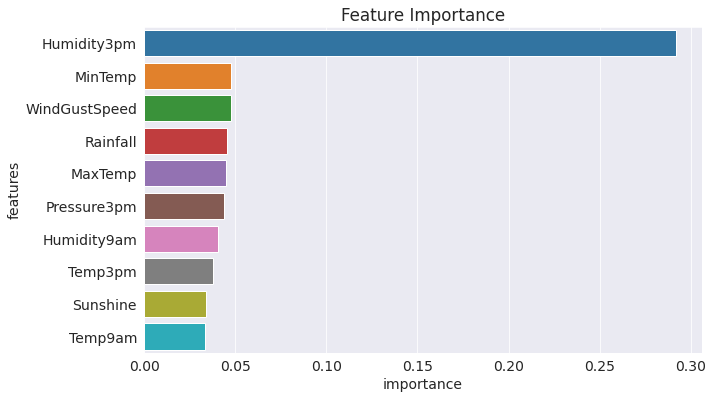

In [47]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='features');

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as _regularlization_.


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

In [48]:
?DecisionTreeClassifier

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

### `max_depth`

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [49]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [50]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

We can compute the accuracy of the model on the training and validation sets using model.score

In [51]:
model.score(X_train, train_targets)

0.8306394010740457

In [52]:
model.score(X_val, val_targets)

0.8172917358114836

Great, while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.

In [53]:
model.classes_

array(['No', 'Yes'], dtype=object)

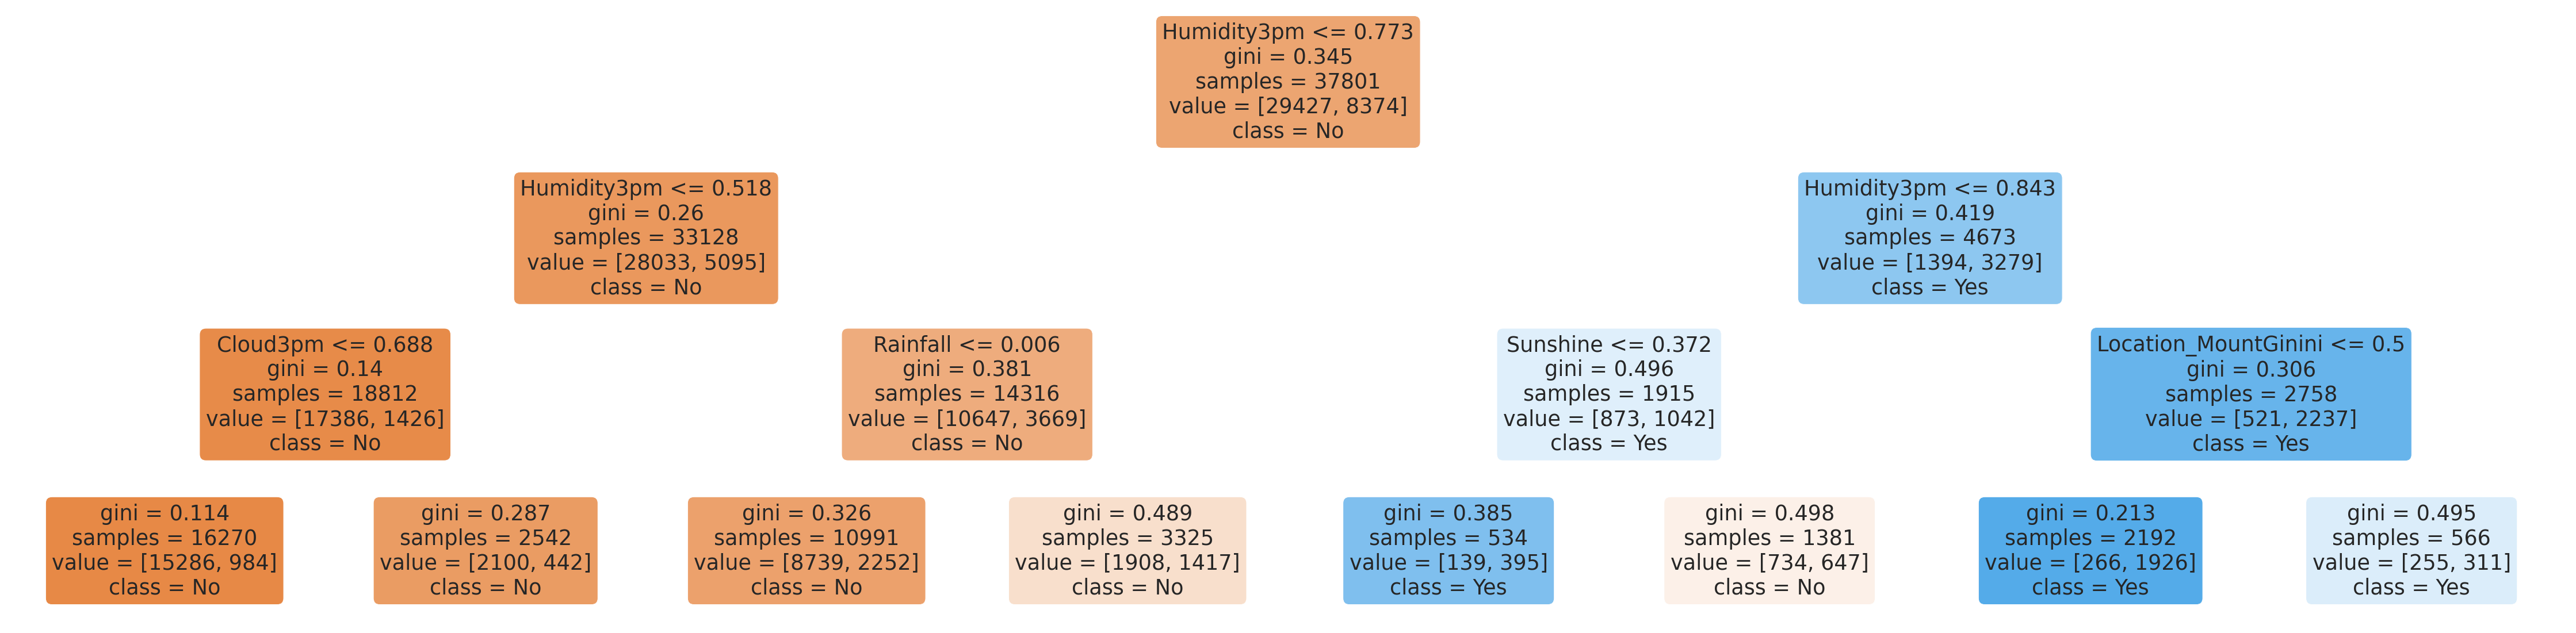

In [54]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [55]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.77
|   |--- Humidity3pm <= 0.52
|   |   |--- Cloud3pm <= 0.69
|   |   |   |--- class: No
|   |   |--- Cloud3pm >  0.69
|   |   |   |--- class: No
|   |--- Humidity3pm >  0.52
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: No
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: No
|--- Humidity3pm >  0.77
|   |--- Humidity3pm <= 0.84
|   |   |--- Sunshine <= 0.37
|   |   |   |--- class: Yes
|   |   |--- Sunshine >  0.37
|   |   |   |--- class: No
|   |--- Humidity3pm >  0.84
|   |   |--- Location_MountGinini <= 0.50
|   |   |   |--- class: Yes
|   |   |--- Location_MountGinini >  0.50
|   |   |   |--- class: Yes



In [56]:
#Let's experiment with different depths using a helper function.
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets) #validation error is one minus validation accuracy.
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [57]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 12.2 s, sys: 29.3 ms, total: 12.2 s
Wall time: 12.3 s


In [58]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.171662,0.178560
1,2,0.171662,0.178560
2,3,0.169361,0.182708
3,4,0.161609,0.174743
4,5,0.157985,0.173083
5,6,0.153144,0.173083
6,7,0.146213,0.177398
7,8,0.138171,0.174577
8,9,0.130473,0.175573
9,10,0.120023,0.179057


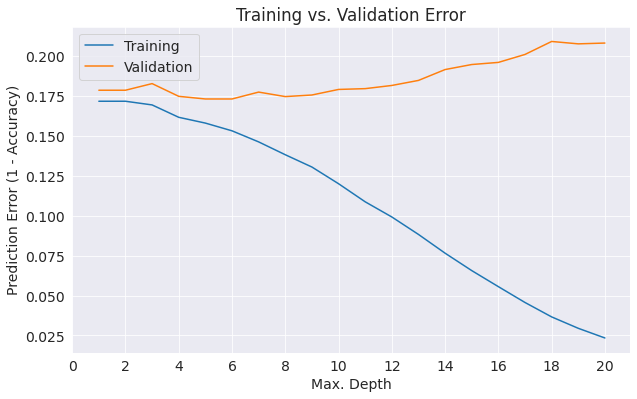

In [59]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

This is a common pattern you'll see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="480">


You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 7 results in the lowest validation error.

In [60]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.822602057749751

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

In [61]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [62]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=128,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [63]:
model.score(X_train, train_targets)

0.8579402661305257

In [64]:
model.score(X_val, val_targets)

0.8282442748091603

In [65]:
model.tree_.max_depth

14

Notice that the model was able to achieve a greater depth of 12 for certain paths while keeping other paths shorter.

In [66]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.77
|   |--- Humidity3pm <= 0.52
|   |   |--- Cloud3pm <= 0.69
|   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |--- Humidity3pm <= 0.44
|   |   |   |   |   |--- Pressure3pm <= 0.55
|   |   |   |   |   |   |--- Humidity9am <= 0.65
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Humidity9am >  0.65
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Pressure3pm >  0.55
|   |   |   |   |   |   |--- class: No
|   |   |   |   |--- Humidity3pm >  0.44
|   |   |   |   |   |--- MaxTemp <= 0.62
|   |   |   |   |   |   |--- Rainfall <= 0.01
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Rainfall >  0.01
|   |   |   |   |   |   |   |--- Sunshine <= 0.38
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Sunshine >  0.38
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- MaxTemp >  0.62
|   |   |   |   |   |   |--- Pressure3pm <= 0.55
|   |   |   |   |   |

EXERCISE: 
1. Find the combination of max_depth and max_leaf_nodes that results in the highest validation accuracy.
2. A more advanced technique (but less commonly used technique) for reducing overfitting in decision trees is known as cost-complexity pruning. Learn more about it here: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html . Implement cost complexity pruning.
3. Explore and experiment with other arguments of DecisionTree.